In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('India_new_car_sales_by_make.csv')
print(df)

      Year  Month          Make  Quantity   Pct
0     2015      1        Toyota      2884  22.7
1     2015      1    Volkswagen      2521  19.9
2     2015      1      Mahindra      1029   8.1
3     2015      1          Ford       870   6.9
4     2015      1         Volvo       693   5.5
...    ...    ...           ...       ...   ...
4372  2025      1  Force Motors         3   0.0
4373  2025      1      Maserati         2   0.0
4374  2025      1       Ferrari         1   0.0
4375  2025      1         Smart         1   0.0
4376  2025      1     Ssangyong         1   0.0

[4377 rows x 5 columns]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [3]:
df.isnull().sum()

Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64

In [4]:
df = pd.read_csv('India_new_car_sales_by_make.csv')

x = df["Make"].mode()[0]

df["Make"].fillna(x, inplace = True)

C:\Users\mas12\AppData\Local\Temp\ipykernel_11344\216218563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Make"].fillna(x, inplace = True)


In [5]:
df.isnull().sum()

Year        0
Month       0
Make        0
Quantity    0
Pct         0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder as LE

In [7]:
le_make= LE()

In [8]:
df['Make']=le_make.fit_transform(df['Make'])
df['Make']

0       59
1       60
2       38
3       21
4       61
        ..
4372    20
4373    40
4374    17
4375    53
4376    54
Name: Make, Length: 4377, dtype: int32

In [9]:
X = df.drop(columns = ['Pct']).values
y = df['Pct'].values

In [10]:
X

array([[2015,    1,   59, 2884],
       [2015,    1,   60, 2521],
       [2015,    1,   38, 1029],
       ...,
       [2025,    1,   17,    1],
       [2025,    1,   53,    1],
       [2025,    1,   54,    1]], dtype=int64)

In [11]:
y

array([22.7, 19.9,  8.1, ...,  0. ,  0. ,  0. ])

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.3, random_state= 40)

In [13]:
X_train

array([[2015,    2,   22,  356],
       [2018,    8,   42,  389],
       [2017,    3,    6,    9],
       ...,
       [2022,    7,   48,   34],
       [2021,   11,   23,  211],
       [2022,    9,    0,  287]], dtype=int64)

In [14]:
y_train

array([3.6, 3.7, 0.1, ..., 0.3, 1.7, 2.5])

In [15]:
X_test

array([[2015,    7,   15,   26],
       [2025,    1,   20,    3],
       [2024,    8,   52,  529],
       ...,
       [2023,    1,    0,   95],
       [2024,   12,   38,  270],
       [2018,    6,   60, 1425]], dtype=int64)

In [16]:
X_test

array([[2015,    7,   15,   26],
       [2025,    1,   20,    3],
       [2024,    8,   52,  529],
       ...,
       [2023,    1,    0,   95],
       [2024,   12,   38,  270],
       [2018,    6,   60, 1425]], dtype=int64)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([ 0.6954939 , -0.40177114,  4.2852732 , ...,  0.53093367,
        1.93489133, 12.7242816 ])

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
print ("Cofficient (Slope):",model.coef_[0])
print ("Intercept:",model.intercept_)
print ('Mean Squared Error (MSE):', mean_squared_error(y_test ,y_pred))
print ('R^2 Score:',r2_score(y_test ,y_pred))

Cofficient (Slope): -0.09919333739011404
Intercept: 200.38599034893153
Mean Squared Error (MSE): 0.3466683186135397
R^2 Score: 0.9722405905253675


In [23]:
import matplotlib.pyplot as plt

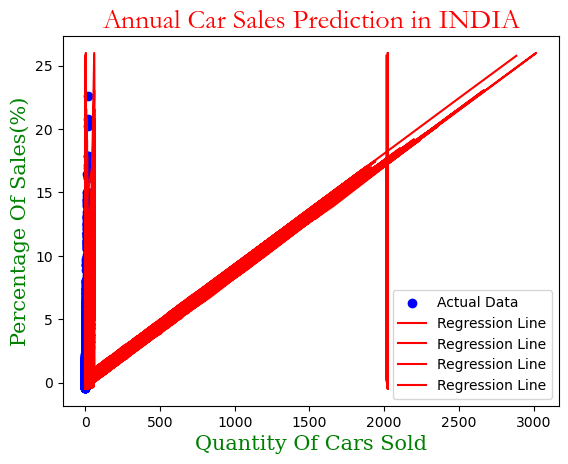

In [24]:
plt.scatter(y_test,y_pred, color= "blue", label="Actual Data")
plt.plot(X, model.predict (X), color='red', label='Regression Line')
font1 =  {'family':'Garamond','color':'red','size':20}
font2 =  {'family':'serif', 'color':'green', 'size':15}
plt.xlabel('Quantity Of Cars Sold', fontdict = font2)
plt.ylabel('Percentage Of Sales(%)', fontdict = font2)
plt.title('Annual Car Sales Prediction in INDIA', fontdict = font1)
plt.legend()
plt.show()

In [54]:
import seaborn as sns

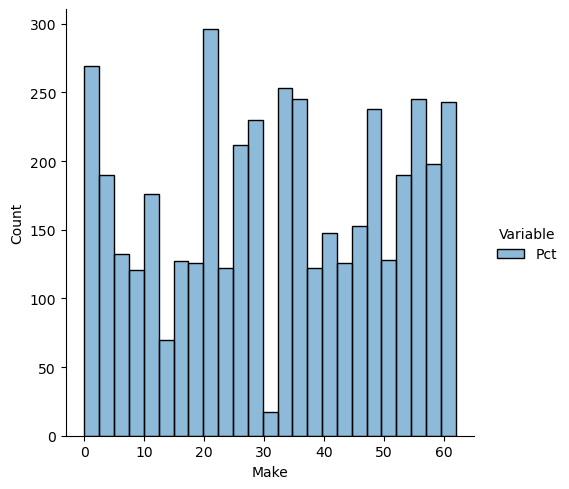

In [68]:
df_long = pd.melt(df, id_vars=['Make'], value_vars=['Pct'], var_name='Variable', value_name='Value')
sns.displot(df_long, x='Make', hue='Variable', kind='hist', bins=25)
plt.show()

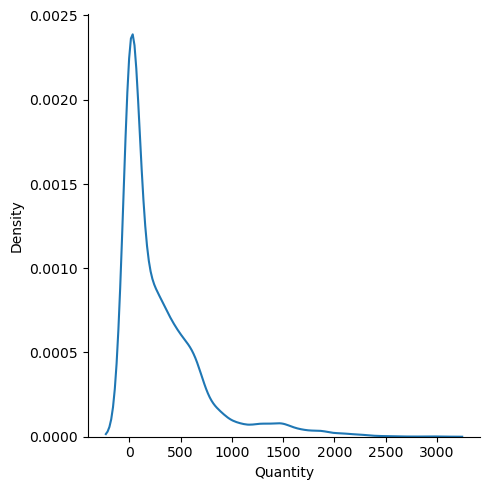

In [70]:
sns.displot(df['Quantity'],kind= 'kde')
plt.show()